# 1x5 - PLA e Linear Regression

Bibliotecas

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import randint, random, seed
from sklearn.metrics import confusion_matrix, precision_recall_curve, classification_report

In [2]:
TRAIN_PATH = 'dataset/train1x5.csv'
TEST_PATH = 'dataset/test1x5.csv'

train1x5 = pd.read_csv(TRAIN_PATH)
test1x5 = pd.read_csv(TEST_PATH)

Construindo vetores

In [3]:
X_train = [(x,y) for x, y in zip(train1x5['intensidade'], train1x5['simetria'])]
y_train = train1x5['label']

X_test = [(x,y) for x, y in zip(test1x5['intensidade'], test1x5['simetria'])]
y_test = test1x5['label']

# Perceptron 

- Tem que ser max_iter = n de pontos
- Guardar a melhor solução
- w pode comecar com 0 ou random

A linha de decisão é dada pela equação: $w_1x_1+w_2x_2+b=0$, onde $w_1 e w_2$​ são os pesos e b é o viés.

$h(x) = sign(w^Tx)$

$w=w+y_ix_i$

In [4]:
class PocketPla():
    def __init__(self,max_iter):
        self.max_iter = max_iter
        self.best_w = None
        self.best_eIN = None
        self.iterations = 0


    def constroiListaPCI(self,X,y,w):
        listaPCI = [i for i in range(len(X)) if np.sign(np.dot(X[i], w)) != y[i]]
        return listaPCI
    
    def predict(self, X):
        X = np.column_stack((np.ones(len(X)), X))
        return np.sign(np.dot(X, self.best_w))
    
    def getW(self): 
        return self.best_w
    
    def h(self, x): # função de ativação
        x = np.column_stack((np.ones(len(x)), x))
        return np.sign(np.dot(self.best_w, x))
    
    def getOriginalY(self, originalX):
        return (-self.best_w[0] - self.best_w[1]*originalX) / self.best_w[2]
    
    def getIterations(self):
        return self.iterations
    
    def getBestEin(self,X):
        return self.best_eIN

    def fit(self, X, y):
        X = np.column_stack((np.ones(len(X)), X))
        w = [0,0,0]
        self.best_w = w.copy()

        for _ in range(self.max_iter):
            self.iterations += 1
            listaPCI = self.constroiListaPCI(X,y,w)

            if len(listaPCI) == 0:
                break

            i = np.random.choice(listaPCI) # escolhe um índice aleatório da lista PCI
            w = w + y[i]*X[i] # atualizaÇÃO do vetor de pesos
            error_count = len(self.constroiListaPCI(X,y,w))/X.shape[0] # calcula o erro de classificação

            if self.best_eIN is None or error_count < self.best_eIN:
                self.best_eIN = error_count
                self.best_w = w
    
        return self

In [5]:
X_train = np.array(X_train)
y_train = np.array(y_train)
y_train_transformed = np.where(y_train == 1, 1, -1) # transformando 1 em 1 e 5 em -1
n = X_train.shape[0]
PLA = PocketPla(n)
PLA.fit(X_train, y_train_transformed)
w = PLA.getW()
w


array([ 54.        , -29.40784314,  19.86666667])

In [6]:
y_train_transformed

array([ 1,  1,  1, ..., -1, -1, -1])

In [7]:
X_test = np.array(X_test)
y_test = np.array(y_test)
y_test_transformed = np.where(y_test == 1, 1, -1) # 1 onde é 1 e -1 onde é 5
y_pred = PLA.predict(X_test)
#y_pred

In [8]:
accuracy = np.mean(y_pred == y_test_transformed)
accuracy

0.6706689536878216

In [49]:
ein = PLA.getBestEin(X_train)
eout = np.mean(y_pred != y_test_transformed)

print(f'Ein: {ein:.2f}')
print(f'Eout: {eout:.2f}')

Ein: 0.32
Eout: 0.33


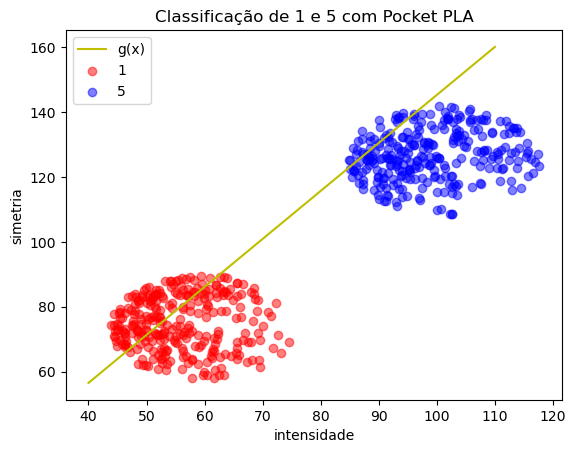

In [45]:
label_1 = test1x5[test1x5['label'] == 1]
label_5 = test1x5[test1x5['label'] == 5]
xOri = [40, 110]
yOri = [PLA.getOriginalY(xOri[0]), PLA.getOriginalY(xOri[1])]
plt.plot(xOri, yOri, label='g(x)',color='y')
plt.scatter(label_1['intensidade'], label_1['simetria'],color='red', label='1', alpha=0.5)
plt.scatter(label_5['intensidade'], label_5['simetria'],color='blue', label='5', alpha=0.5)
plt.xlabel('intensidade')
plt.ylabel('simetria')
plt.title('Classificação de 1 e 5 com Pocket PLA')
plt.legend()
plt.show()


In [57]:
print(classification_report(y_test_transformed, y_pred))

              precision    recall  f1-score   support

          -1       0.62      0.91      0.73       291
           1       0.82      0.43      0.57       292

    accuracy                           0.67       583
   macro avg       0.72      0.67      0.65       583
weighted avg       0.72      0.67      0.65       583



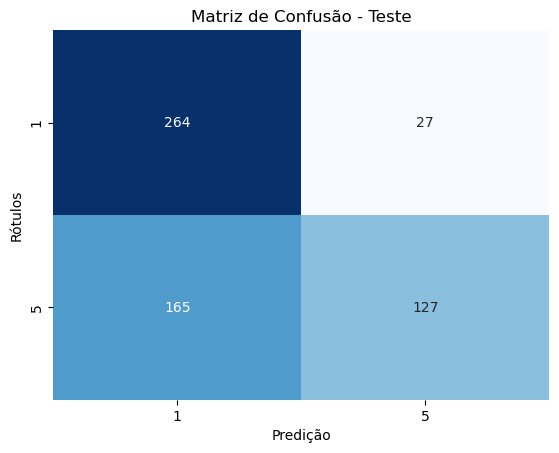

In [55]:

cm_test = confusion_matrix(y_test_transformed, y_pred)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['1', '5'], 
            yticklabels=['1', '5'])
plt.xlabel('Predição')
plt.ylabel('Rótulos')
plt.title('Matriz de Confusão - Teste')
plt.show()

# Linear Regression

vetor de pesos $w=(X^TX)^{-1}X^Ty$

In [10]:
class LinearRegression():
    def __init__(self):
        self.w = None

    def getW(self):
        return self.w
    
    def fit(self, _X, _y):
        s = _X.shape[0]
        X = np.column_stack((np.ones(s), _X))
        self.w = np.linalg.inv(X.T @ X) @ X.T @ _y
        return self
    
    def predict(self, _X):
        if self.w is None:
            raise Exception('Modelo não treinado')
        s = _X.shape[0]
        X = np.column_stack((np.ones(s), _X))
        return X @ self.w
    

class LRClassifier():
    def execute(self, _X, _y):
        lr = LinearRegression()
        lr.fit(_X, _y)
        self.w = lr.getW()
                
    def predict(self, x_):
        return np.sign(np.dot(np.insert(x_, 0, 1,axis=1), self.w))
     
    def getRegressionY(self, regressionX, shift=0):
        return (-self.w[0]+shift - self.w[1]*regressionX) / self.w[2]

In [11]:
lrc = LRClassifier()
lrc.execute(X_train, y_train_transformed)
w = lrc.w
predictions = lrc.predict(X_test)
accuracy = np.mean(predictions == y_test_transformed)
accuracy

1.0

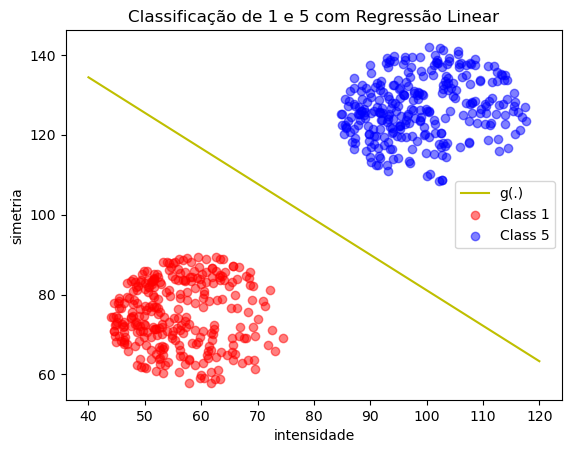

In [42]:
xOri = [40, 120]
yOri = [lrc.getRegressionY(xOri[0]), lrc.getRegressionY(xOri[1])]
plt.plot(xOri, yOri, '-y', label='g(.)')

# Mask for class 1
mask_1 = (y_test_transformed == 1)
plt.scatter(X_test[mask_1, 0], X_test[mask_1, 1], c='red', label='Class 1', alpha = 0.5)

# Mask for class 5
mask_5 = (y_test_transformed == -1)
plt.scatter(X_test[mask_5, 0], X_test[mask_5, 1], c='blue', label='Class 5', alpha = 0.5)

plt.xlabel('intensidade')
plt.ylabel('simetria')
plt.title('Classificação de 1 e 5 com Regressão Linear')
plt.legend()
plt.show()

In [58]:
print(classification_report(y_test_transformed, predictions))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       291
           1       1.00      1.00      1.00       292

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583



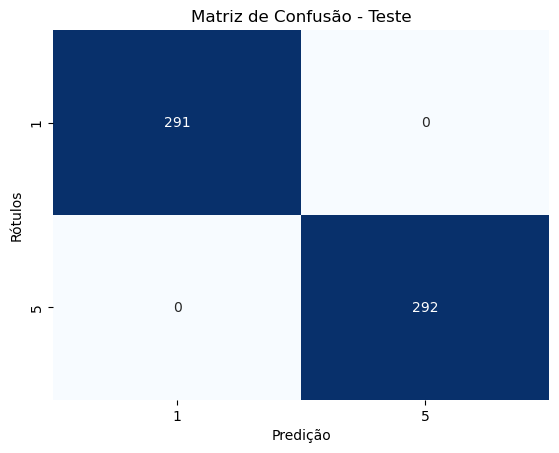

In [56]:

cm_test = confusion_matrix(y_test_transformed, predictions)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['1', '5'], 
            yticklabels=['1', '5'])
plt.xlabel('Predição')
plt.ylabel('Rótulos')
plt.title('Matriz de Confusão - Teste')
plt.show()